In [52]:
DATOS_DIR = 'C:/Users/Peter/Desktop/all/Facu/Mineria De Datos Usando Sistemas Inteligentes/Datos/'          # carpeta donde se encuentran los datasets

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv(DATOS_DIR + 'Mental_Health_Lifestyle_Dataset.csv')
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


In [55]:
stress_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}
exercise_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}

# Aplicamos los mapeos
df['Stress Level'] = df['Stress Level'].map(stress_mapping)
df['Exercise Level'] = df['Exercise Level'].map(exercise_mapping)

df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,0.0,Vegetarian,6.3,0.0,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,0.5,Vegan,4.9,0.0,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,0.0,Vegetarian,7.2,1.0,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,0.0,Vegan,7.2,0.0,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,0.0,Balanced,7.3,0.0,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,0.5,Balanced,7.0,1.0,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,0.0,Junk Food,7.1,0.0,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,0.5,Balanced,6.0,1.0,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,1.0,Keto,5.7,0.0,Anxiety,51,4.3,5.9,4.1


In [56]:
# Eliminamos la columna Gender y creamos columnas binarias para cada género
df["Male"] = (df["Gender"] == "Male").astype(int)
df["Female"] = (df["Gender"] == "Female").astype(int)
df["Other"] = (df["Gender"] == "Other").astype(int)
# Eliminamos la columna original de Gender
df = df.drop("Gender", axis=1)

df.head()

,Country,Age,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other
0,Brazil,48,0.0,Vegetarian,6.3,0.0,NaN,21,4.0,7.8,6.5,1,0,0
1,Australia,31,0.5,Vegan,4.9,0.0,PTSD,48,5.2,8.2,6.8,1,0,0
2,Japan,37,0.0,Vegetarian,7.2,1.0,NaN,43,4.7,9.6,9.7,0,1,0
3,Brazil,35,0.0,Vegan,7.2,0.0,Depression,43,2.2,8.2,6.6,1,0,0
4,Germany,46,0.0,Balanced,7.3,0.0,Anxiety,35,3.6,4.7,4.4,1,0,0


In [57]:
df["Vegetarian"] = (df["Diet Type"] == "Vegetarian").astype(int)
df["Vegan"] = (df["Diet Type"] == "Vegan").astype(int)
df["Balanced"] = (df["Diet Type"] == "Balanced").astype(int)
df["Keto"] = (df["Diet Type"] == "Keto").astype(int)
df["Junk Food"] = (df["Diet Type"] == "Junk Food").astype(int)
df = df.drop("Diet Type", axis=1)

df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food
0,Brazil,48,0.0,6.3,0.0,NaN,21,4.0,7.8,6.5,1,0,0,1,0,0,0,0
1,Australia,31,0.5,4.9,0.0,PTSD,48,5.2,8.2,6.8,1,0,0,0,1,0,0,0
2,Japan,37,0.0,7.2,1.0,NaN,43,4.7,9.6,9.7,0,1,0,1,0,0,0,0
3,Brazil,35,0.0,7.2,0.0,Depression,43,2.2,8.2,6.6,1,0,0,0,1,0,0,0
4,Germany,46,0.0,7.3,0.0,Anxiety,35,3.6,4.7,4.4,1,0,0,0,0,1,0,0


In [58]:
df["Mental Health Condition"] = df["Mental Health Condition"].fillna("None")

df["PTSD"] = (df["Mental Health Condition"] == "PTSD").astype(int)
df["Anxiety"] = (df["Mental Health Condition"] == "Anxiety").astype(int)
df["Depression"] = (df["Mental Health Condition"] == "Depression").astype(int)
df["None"] = (df["Mental Health Condition"] == "None").astype(int)
df["Bipolar"] = (df["Mental Health Condition"] == "Bipolar").astype(int)
df = df.drop("Mental Health Condition", axis=1)

df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,Brazil,48,0.0,6.3,0.0,21,4.0,7.8,6.5,1,0,0,1,0,0,0,0,0,0,0,1,0
1,Australia,31,0.5,4.9,0.0,48,5.2,8.2,6.8,1,0,0,0,1,0,0,0,1,0,0,0,0
2,Japan,37,0.0,7.2,1.0,43,4.7,9.6,9.7,0,1,0,1,0,0,0,0,0,0,0,1,0
3,Brazil,35,0.0,7.2,0.0,43,2.2,8.2,6.6,1,0,0,0,1,0,0,0,0,0,1,0,0
4,Germany,46,0.0,7.3,0.0,35,3.6,4.7,4.4,1,0,0,0,0,1,0,0,0,1,0,0,0


In [59]:
# Normalización de atributos numéricos
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos solo las columnas numéricas que necesitan normalización
columnas_numericas = ['Age', 'Sleep Hours', 'Screen Time per Day (Hours)', 
                     'Social Interaction Score', 'Happiness Score', "Work Hours per Week"]

# Creamos el escalador
scaler = MinMaxScaler()

# Aplicamos la normalización a las columnas numéricas
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

# Mostramos el dataframe con los datos normalizados
df.head()

,Country,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,Brazil,0.652174,0.0,0.494949,0.0,0.025641,0.333333,0.755556,0.611111,1,0,0,1,0,0,0,0,0,0,0,1,0
1,Australia,0.282609,0.5,0.353535,0.0,0.717949,0.533333,0.800000,0.644444,1,0,0,0,1,0,0,0,1,0,0,0,0
2,Japan,0.413043,0.0,0.585859,1.0,0.589744,0.450000,0.955556,0.966667,0,1,0,1,0,0,0,0,0,0,0,1,0
3,Brazil,0.369565,0.0,0.585859,0.0,0.589744,0.033333,0.800000,0.622222,1,0,0,0,1,0,0,0,0,0,1,0,0
4,Germany,0.608696,0.0,0.595960,0.0,0.384615,0.266667,0.411111,0.377778,1,0,0,0,0,1,0,0,0,1,0,0,0


In [60]:
df = df.drop("Country", axis=1)
df

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
0,0.652174,0.0,0.494949,0.0,0.025641,0.333333,0.755556,0.611111,1,0,0,1,0,0,0,0,0,0,0,1,0
1,0.282609,0.5,0.353535,0.0,0.717949,0.533333,0.800000,0.644444,1,0,0,0,1,0,0,0,1,0,0,0,0
2,0.413043,0.0,0.585859,1.0,0.589744,0.450000,0.955556,0.966667,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0.369565,0.0,0.585859,0.0,0.589744,0.033333,0.800000,0.622222,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0.608696,0.0,0.595960,0.0,0.384615,0.266667,0.411111,0.377778,1,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.847826,0.5,0.565657,1.0,0.230769,0.400000,0.966667,0.544444,0,1,0,0,0,1,0,0,0,0,1,0,0
2996,0.195652,0.0,0.575758,0.0,0.692308,0.900000,0.588889,0.988889,1,0,0,0,0,0,0,1,0,0,0,1,0
2997,0.521739,0.5,0.464646,1.0,0.076923,0.316667,0.466667,0.344444,1,0,0,0,0,1,0,0,0,0,1,0,0
2998,0.152174,1.0,0.434343,0.0,0.794872,0.383333,0.544444,0.344444,1,0,0,0,0,0,1,0,0,1,0,0,0


In [61]:
df.describe()

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.504993,0.489333,0.512721,0.499000,0.499137,0.514972,0.496689,0.488341,0.326667,0.341333,0.33200,0.197333,0.191000,0.208333,0.191000,0.212333,0.208000,0.209333,0.193333,0.198333,0.191000
std,0.291922,0.408381,0.151502,0.409335,0.293627,0.291205,0.284837,0.284178,0.469072,0.474236,0.47101,0.398052,0.393155,0.406184,0.393155,0.409028,0.405944,0.406901,0.394978,0.398811,0.393155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.000000,0.414141,0.000000,0.256410,0.266667,0.255556,0.244444,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.515152,0.500000,0.487179,0.516667,0.500000,0.488889,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760870,1.000000,0.616162,1.000000,0.769231,0.766667,0.733333,0.722222,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


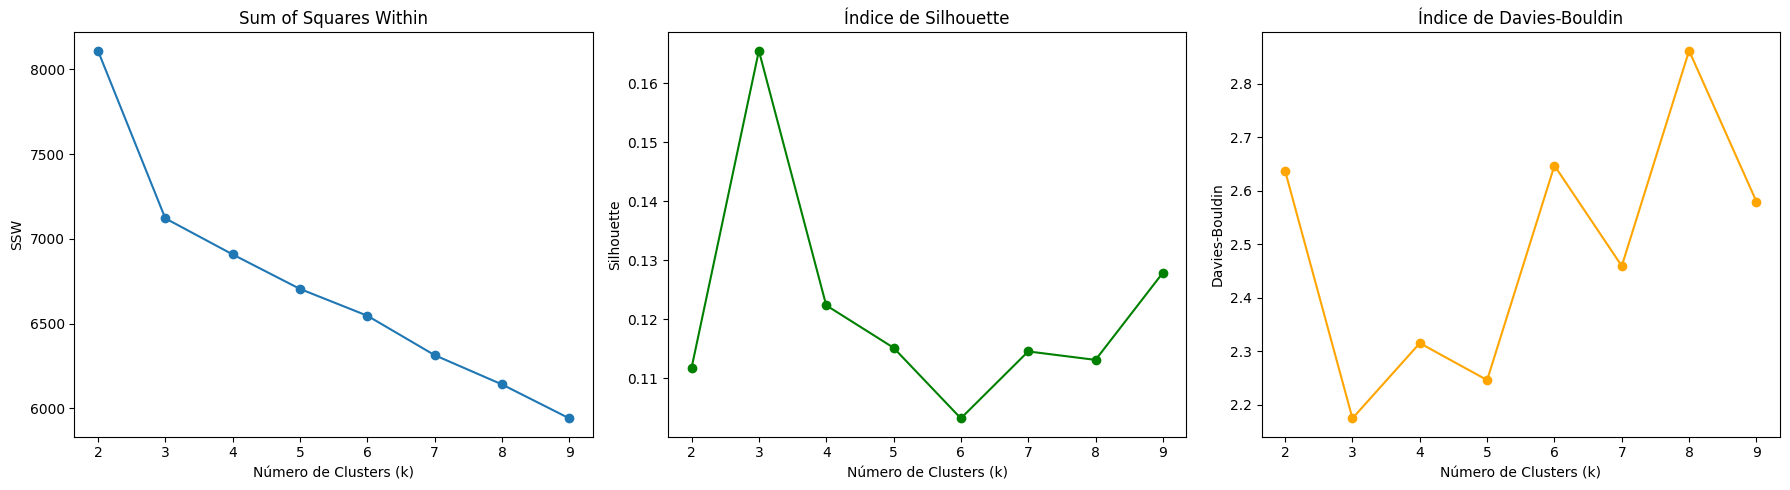

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que df es tu DataFrame ya preprocesado y listo (solo numérico)

# Determinar número óptimo de clusters con varias métricas
inertias = []
silhouettes = []
davies_bouldins = []
K_range = range(2, 10)  # arrancamos en 2 porque silhouette no se puede calcular con k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df, labels))
    davies_bouldins.append(davies_bouldin_score(df, labels))

# Graficar las tres métricas
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Sum of Squares Within")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSW")

plt.subplot(1, 3, 2)
plt.plot(K_range, silhouettes, marker='o', color='green')
plt.title("Índice de Silhouette")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette")

plt.subplot(1, 3, 3)
plt.plot(K_range, davies_bouldins, marker='o', color='orange')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Davies-Bouldin")

plt.tight_layout()
plt.show()





Análisis de clusters:


,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar,Cluster
Cluster 0,0.494990,0.487793,0.517332,0.498535,0.491637,0.524251,0.494727,0.476345,0.0,1.0,0.0,0.189453,0.183594,0.224609,0.188477,0.213867,0.211914,0.213867,0.190430,0.185547,0.198242,0.0
Cluster 1,0.511957,0.480612,0.509689,0.509184,0.502512,0.517857,0.497336,0.497177,1.0,0.0,0.0,0.197959,0.193878,0.192857,0.195918,0.219388,0.206122,0.207143,0.197959,0.198980,0.189796,1.0
Cluster 2,0.508425,0.499498,0.510963,0.489458,0.503527,0.502594,0.498070,0.491979,0.0,0.0,1.0,0.204819,0.195783,0.206827,0.188755,0.203815,0.205823,0.206827,0.191767,0.210843,0.184739,2.0


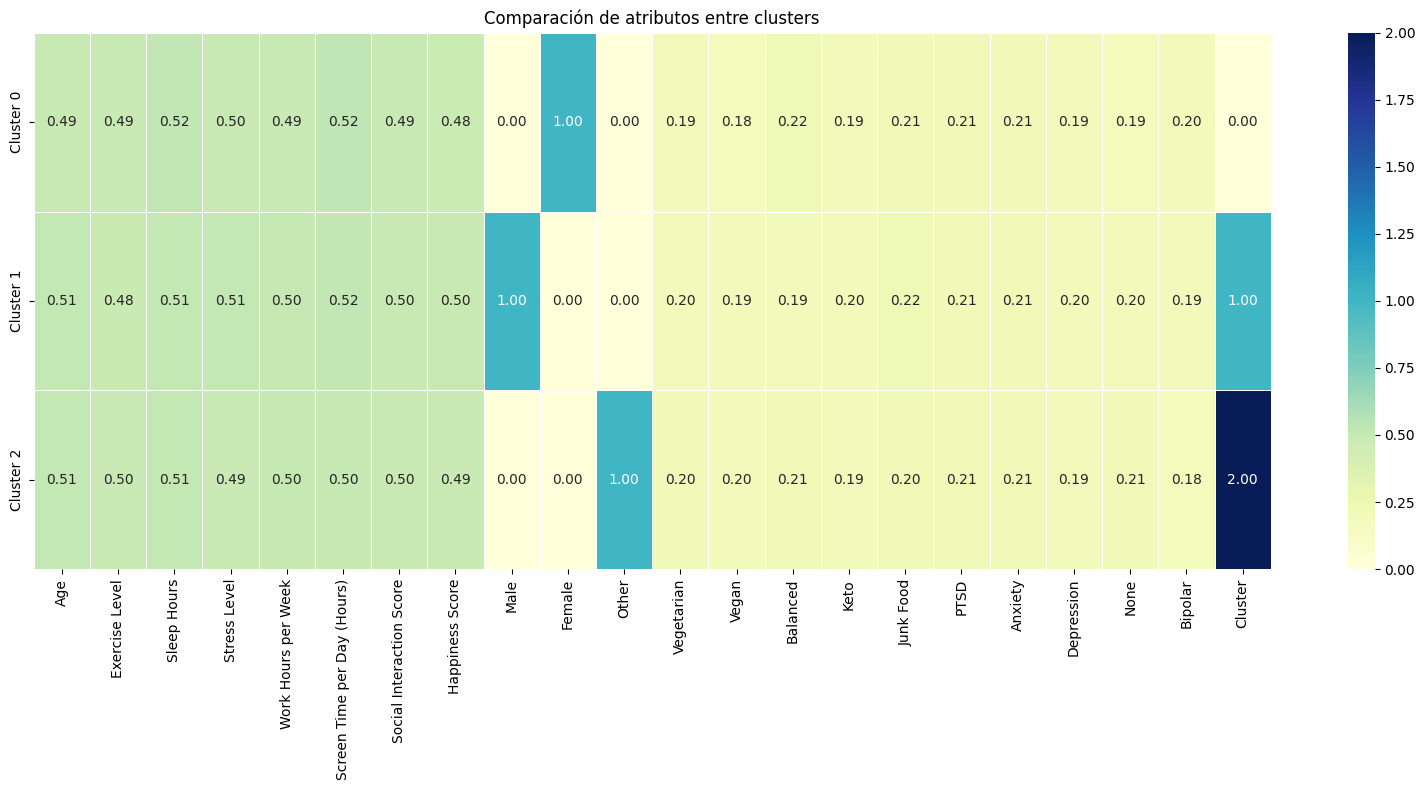

In [63]:
# Elegí tu k óptimo después de ver los gráficos
k_optimo = 3  # por ejemplo, si silhouette fue máximo en 3

# Aplicar KMeans con ese K
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df)

# Analizar clusters
print("Análisis de clusters:")
cluster_stats = pd.DataFrame()

for i in range(k_optimo):
    # Obtener estadísticas para cada cluster
    cluster_data = df[df['Cluster'] == i]
    cluster_mean = cluster_data.mean()
    cluster_mean.name = f"Cluster {i}"
    cluster_stats = pd.concat([cluster_stats, cluster_mean.to_frame().T])

# Mostrar tabla con todos los atributos para cada cluster
display(cluster_stats)

# Visualización adicional con heatmap para comparar clusters
plt.figure(figsize=(16, 8))
sns.heatmap(cluster_stats, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Comparación de atributos entre clusters")
plt.tight_layout()
plt.show()

In [64]:
df.head()

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Male,Female,Other,Vegetarian,Vegan,Balanced,Keto,Junk Food,PTSD,Anxiety,Depression,None,Bipolar,Cluster
0,0.652174,0.0,0.494949,0.0,0.025641,0.333333,0.755556,0.611111,1,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0.282609,0.5,0.353535,0.0,0.717949,0.533333,0.800000,0.644444,1,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0.413043,0.0,0.585859,1.0,0.589744,0.450000,0.955556,0.966667,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.369565,0.0,0.585859,0.0,0.589744,0.033333,0.800000,0.622222,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0.608696,0.0,0.595960,0.0,0.384615,0.266667,0.411111,0.377778,1,0,0,0,0,1,0,0,0,1,0,0,0,1


In [65]:
df.groupby('Cluster')[['Male', 'Female', 'Other']].sum()


,Male,Female,Other
Cluster,,,
0,0,1024,0
1,980,0,0
2,0,0,996
